## 1- Vectors, Matrices and Arrays

### sparse matrix

In [5]:
import numpy as np
from scipy import sparse

mat = np.array([[0, 0],
              [0, 1],
              [3, 0]])
mat_sparse = sparse.csr_matrix(mat)
print(mat_sparse)

large_mat = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0],
    [3,0,0,0,0,0,0,0,0,0,0,0]])
large_mat_sparse = sparse.csr_matrix(large_mat)
print(large_mat_sparse)

  (1, 1)	1
  (2, 0)	3
  (1, 1)	1
  (2, 0)	3


### apply function to mat elements

In [10]:
import numpy as np

# vectorize (loop = no perf optimization)
mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
add_100 = lambda x : x + 100
vec_add_100 = np.vectorize(add_100)
print(vec_add_100(mat))

# broadcasting
print(mat + 100)

[[101 102 103]
 [104 105 106]
 [107 108 109]]
[[101 102 103]
 [104 105 106]
 [107 108 109]]


### min, max, avg, var, std

In [13]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
np.max(mat, axis=1)

array([3, 6, 9])

In [14]:
np.mean(mat)

5.0

In [15]:
np.var(mat)

6.666666666666667

In [16]:
np.std(mat)

2.581988897471611

### reshaping

In [21]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
mat.shape
mat.reshape(2,6)
mat.reshape(3, -1) # -1 == as many as needed

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

### transform

In [22]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
mat.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

### flatten

In [24]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
mat.flatten() # compare to mat.reshape(1, -1) ;-)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### rank

In [25]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
np.linalg.matrix_rank(mat)

2

### determinant

In [27]:
import numpy as np

mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
np.linalg.det(mat)

6.66133814775094e-16

In [28]:
mat = np.array([[1,2,3], [2,4,6], [3,8,9]])
np.linalg.det(mat)

0.0

### diagonal

In [30]:
mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
mat.diagonal()

array([1, 5, 9])

### trace = sum of main diagonla

In [32]:
mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
mat.trace() == sum(mat.diagonal())

True

### eigenvalues & eingenvectors

$Av = \lambda v$

In [46]:
mat = np.array([[1,2,3], [4,5,6], [7,8,9]])
eigenvalues, eigenvectors = np.linalg.eig(mat)
print(f'eigenvalues = {eigenvalues}\neigenvectors = {eigenvectors}')

eigenvalues = [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
eigenvectors = [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


### dot product 

$\sum_{i=1}^{n} a_i b_i$

In [47]:
import numpy as np

v1 = np.array([1,2,3])
v2 = np.array([4,5,6])

np.dot(v1, v2)

32

In [50]:
# python 3.5+
v1 @ v2

32

### matrix multiplication

In [52]:
import numpy as np

mat1 = np.array([[1,2],[4,3]])
mat2 = np.array([[4,5],[7,6]])

np.dot(mat1, mat2)

array([[18, 17],
       [37, 38]])

In [53]:
mat1 @ mat2

array([[18, 17],
       [37, 38]])

### inverse

$AA^{-1} = 1$

In [54]:
import numpy as np

mat1 = np.array([[1,2],[4,3]])
np.linalg.inv(mat1)

array([[-0.6,  0.4],
       [ 0.8, -0.2]])

In [55]:
mat1 @ np.linalg.inv(mat1)

array([[1., 0.],
       [0., 1.]])

### random matrix

In [63]:
import numpy as np

np.random.seed(0)
np.random.uniform(1.0,2.0,3)

array([1.5488135 , 1.71518937, 1.60276338])

## Loading Data

### load sample dataset

In [71]:
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data
target = digits.target

print(features[0])
print(len(target))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
1797


### create simulated dataset

#### linear regression

In [81]:
from sklearn.datasets import make_regression

features, target, coefficient = make_regression(
    n_samples=100,
    n_features=3,
    n_informative=3,
    n_targets=1,
    noise=0.0,
    coef=True,
    random_state=1)

print(f'features:\n{features[:3]}')
print(f'target:\n{target[:3]}')

features:
[[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
target:
[-10.37865986  25.5124503   19.67705609]


#### classification

In [80]:
from sklearn.datasets import make_classification

features, target = make_classification(
    n_samples=100,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[0.25,0.75],
    random_state=1)

print(f'features:\n{features[:3]}')
print(f'target:\n{target[:3]}')

features:
[[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
target:
[1 0 0]


#### clustering

In [82]:
from sklearn.datasets import make_blobs

features, target = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=.5,
    shuffle=True,
    random_state=1
)
print(f'features:\n{features[:3]}')
print(f'target:\n{target[:3]}')

features:
[[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
target:
[0 1 1]


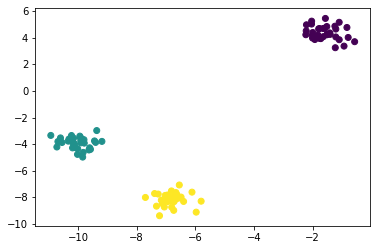

In [84]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=target)

### querying SQL database

In [111]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData

meta = MetaData()

students = Table(
   'students', meta, 
   Column('id', Integer, primary_key = True), 
   Column('name', String), 
   Column('lastname', String), 
)
meta.create_all(engine)

ins = students.insert()

engine = create_engine('sqlite:///sample.db')

with engine.connect() as conn:
    for fname, lname in [('fname1', 'lname1'), ('fname2', 'lname3')]:
        conn.execute(ins.values(name=fname, lastname=lname))

df = pd.read_sql_query('select * from students', engine)
df.head(2)

,id,name,lastname
0,1,fname1,lname1
1,2,fname2,lname3
2,3,fname1,lname1
3,4,fname2,lname3
4,5,fname1,lname1
5,6,fname2,lname3


## 2- Data Wrangling

#### dataframe

In [112]:
import pandas as pd
url = "https://tinyurl.com/titanic-csv"

df = pd.read_csv(url)
df.head(5)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [114]:
df.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [115]:
df.iloc[0]

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                   29
Sex                               female
Survived                               1
SexCode                                1
Name: 0, dtype: object

In [118]:
df.iloc[:4]

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [119]:
df.loc[0]

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                   29
Sex                               female
Survived                               1
SexCode                                1
Name: 0, dtype: object

#### conditional selection

In [123]:
df[df['Sex'] == 'female'].head(5)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.0,female,1,1


### dataframe manipulation (not in place)

#### replace values

In [127]:
df['Sex'].replace(['female', 'male'], ['woman', 'man']).head(5)

0    woman
1    woman
2      man
3    woman
4      man
Name: Sex, dtype: object

#### rename columns

In [130]:
df.rename(columns={'PClass': 'Passenger Class', 'Sex': 'Gender'}).head(5)

,Name,Passenger Class,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [132]:
# get all column names in dataframe

import collections
column_names = collections.defaultdict(str)
for name in df.columns:
    column_names[name]
column_names

defaultdict(str,
            {'Name': '',
             'PClass': '',
             'Age': '',
             'Sex': '',
             'Survived': '',
             'SexCode': ''})

#### count

In [133]:
df.count()

Name        1313
PClass      1313
Age          756
Sex         1313
Survived    1313
SexCode     1313
dtype: int64

#### find unique values

In [134]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [136]:
df['Sex'].value_counts()

male      851
female    462
Name: Sex, dtype: int64

In [137]:
df['PClass'].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

In [140]:
df['PClass'].nunique() # number of unique values

4

#### find missing data (null)

In [142]:
df[df['Age'].isnull()].head(5)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
14,"Baumann, Mr John D",1st,NaN,male,0,0
29,"Borebank, Mr John James",1st,NaN,male,0,0
32,"Bradley, Mr George",1st,NaN,male,1,0


In [144]:
# Nan comes from numpy

import numpy as np
df['Sex'].replace('male', np.nan).head(5)

0    female
1    female
2       NaN
3    female
4       NaN
Name: Sex, dtype: object

#### delete columns

In [148]:
df.drop(['Age', 'Sex'], axis=1).head(3)

,Name,PClass,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,1,1
1,"Allison, Miss Helen Loraine",1st,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,0,0


#### delete rows

In [150]:
# just filter!
df[df['Sex'] == 'male'].head(5)

,Name,PClass,Age,Sex,Survived,SexCode
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,"Anderson, Mr Harry",1st,47.00,male,1,0
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


#### remove duplicate rows

In [153]:
df.drop_duplicates(subset=['Sex'], keep='last').head(4)

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


#### group rows by value

In [167]:
df.groupby(['Survived', 'PClass']).count()

Name  Age  Sex  SexCode
Survived PClass                         
0        *          1    0    1        1
         1st      129   87  129      129
         2nd      160  116  160      160
         3rd      573  240  573      573
1        1st      193  139  193      193
         2nd      119   96  119      119
         3rd      138   78  138      138

#### group by time

In [185]:
import pandas as pd
import numpy as np

time_index = pd.date_range('06.06.2018', periods=100000, freq='30S')
df_t = pd.DataFrame(index=time_index)
df_t['Sale_Amount'] = np.random.randint(1, 10, 100000)
print(df_t.head(5))
print(df_t.resample('W').count())
print(df_t.resample('W', label='left').count())

                     Sale_Amount
2018-06-06 00:00:00            8
2018-06-06 00:00:30            9
2018-06-06 00:01:00            6
2018-06-06 00:01:30            2
2018-06-06 00:02:00            3
            Sale_Amount
2018-06-10        14400
2018-06-17        20160
2018-06-24        20160
2018-07-01        20160
2018-07-08        20160
2018-07-15         4960
            Sale_Amount
2018-06-03        14400
2018-06-10        20160
2018-06-17        20160
2018-06-24        20160
2018-07-01        20160
2018-07-08         4960


#### lopping over column

In [187]:
for name in df['Name'].head(3):
    print(name)

Allen, Miss Elisabeth Walton
Allison, Miss Helen Loraine
Allison, Mr Hudson Joshua Creighton


In [188]:
[name.upper() for name in df['Name'][:3]]

['ALLEN, MISS ELISABETH WALTON',
 'ALLISON, MISS HELEN LORAINE',
 'ALLISON, MR HUDSON JOSHUA CREIGHTON']

#### apply lambda to column values

In [191]:
df['Name'].apply(lambda x: x.upper())[:3]

0           ALLEN, MISS ELISABETH WALTON
1            ALLISON, MISS HELEN LORAINE
2    ALLISON, MR HUDSON JOSHUA CREIGHTON
Name: Name, dtype: object

#### apply function to groups

In [194]:
print(df.groupby('Sex').apply(lambda x: x.count()))
print(df.groupby('Sex').count())

        Name  PClass  Age  Sex  Survived  SexCode
Sex                                              
female   462     462  288  462       462      462
male     851     851  468  851       851      851
        Name  PClass  Age  Survived  SexCode
Sex                                         
female   462     462  288       462      462
male     851     851  468       851      851


#### concat dataframes

In [197]:
import pandas as pd

data_a = {
    'id' : ['1', '2', '3'],
    'first': ['Alex', 'Amy', 'Allen'],
    'last': ['Anderson', 'Ackman', 'Ali']
}
df_a = pd.DataFrame(data_a, columns=['id', 'first', 'last'])

data_b = {
    'id' : ['4', '5', '6'],
    'first': ['Billy', 'Brian', 'Bran'],
    'last': ['Bonder', 'Black', 'Balwner']
}
df_b = pd.DataFrame(data_b, columns=['id', 'first', 'last'])

pd.concat([df_a, df_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


#### merge dataframes (joins)

In [207]:
import pandas as pd

employee_data = {
    'employee_id': ['1', '2', '3', '4'],
    'name': ['Amy Jones', 'Allen Keys', 'Alice Bees', 'Tim Horton']
}
df_employees = pd.DataFrame(employee_data, columns=['employee_id', 'name'])

sales_data = {
    'employee_id': ['3', '4', '5', '6'],
    'total_sales': [23456, 2512, 2345, 1455]
}
df_sales = pd.DataFrame(sales_data, columns=['employee_id', 'total_sales'])

In [208]:
# inner join
pd.merge(df_employees, df_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


In [209]:
# outer join
pd.merge(df_employees, df_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [206]:
# custom join
pd.merge(df_employees, df_sales, left_on='employee_id', right_on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


## 4- handling numerical data

### rescale a feature

$x'_i = \frac{x_i - min(x)}{max(x) - min(x)}$

In [4]:
import numpy as np
from sklearn import preprocessing

feat = np.array([
    [-500.5],
    [-100.1],
    [0],
    [100.1],
    [900.9],
])
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feat = minmax_scale.fit_transform(feat)
scaled_feat

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

### standardizing a feature

$x'_i = \frac{x_i - \bar{x}}{\sigma}$

In [5]:
import numpy as np
from sklearn import preprocessing

feat = np.array([
    [-1000.1],
    [-200.2],
    [500.5],
    [600.6],
    [9000.9],
])
scaler = preprocessing.StandardScaler()
std_feat = scaler.fit_transform(feat)
std_feat

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

### normalize observations

Euclidean norm:

$\|{x}\|_2 = \sqrt{x^2_1+x^2_2+x^2_3+...+x^2_n}$

In [5]:
import numpy as np
from sklearn.preprocessing import Normalizer

feats = np.array([
    [0.5, 0.5],
    [1.1, 3.4],
    [1.5, 20.2],
    [1.63, 34.4],
    [10.9, 3.3],
])
Normalizer(norm="l2").transform(feats)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

Manhattan norm:

$\|x\|_1 = \sum^n_{i=1}{\|x_i\|}$

In [4]:
Normalizer(norm="l1").transform(feats)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

### generate polynomial featues

In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

feats = np.array([
    [2,3],
    [2,3],
    [2,3],
])
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

polynomial_interaction.fit_transform(feats)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

### custom transform features

In [10]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

feats = np.array([
    [2,3],
    [2,3],
    [2,3],
])
FunctionTransformer(lambda x : x + 10, validate=True).transform(feats)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [11]:
# with pandas

import pandas as pd

df = pd.DataFrame(feats, columns=["feat1", "feat2"])
df.apply(lambda x:x+10)

,feat1,feat2
0,12,13
1,12,13
2,12,13


### detecting outliners

In [9]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

feats, _ = make_blobs(
    n_samples=10,
    n_features=2,
    centers=1,
    random_state=1)
feats[0,0] = 10000
feats[0,1] = 10000
print(feats)
outliner_detector = EllipticEnvelope(contamination=.1)
outliner_detector.fit(feats)
outliner_detector.predict(feats)

[[ 1.00000000e+04  1.00000000e+04]
 [-2.76017908e+00  5.55121358e+00]
 [-1.61734616e+00  4.98930508e+00]
 [-5.25790464e-01  3.30659860e+00]
 [ 8.52518583e-02  3.64528297e+00]
 [-7.94152277e-01  2.10495117e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-2.18773166e+00  3.33352125e+00]
 [-1.97451969e-01  2.34634916e+00]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
# interquartal range IQR

feat = feats[:,0]

# find outliners index
def indicies_of_outliners(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

indicies_of_outliners(feat)

(array([0]),)

### handling outliners

##### drop them

In [16]:
import pandas as pd

houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 43280232]
houses['Bathrooms'] = [2,3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# filter observations
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [18]:
import numpy as np

houses['Outliner'] = np.where(houses['Bathrooms'] < 20, 0, 1)
houses

,Price,Bathrooms,Square_Feet,Outliner
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,43280232,116.0,48000,1


In [21]:
# dampen the effect of the outliner
houses['Log_of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]
houses

,Price,Bathrooms,Square_Feet,Outliner,Log_of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,43280232,116.0,48000,1,10.778956


### discretizing features

In [22]:
import numpy as np
from sklearn.preprocessing import Binarizer

age = np.array([
    [6],
    [12],
    [20],
    [36],
    [65],
])
binarizer = Binarizer(18)
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [24]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

### clustering features

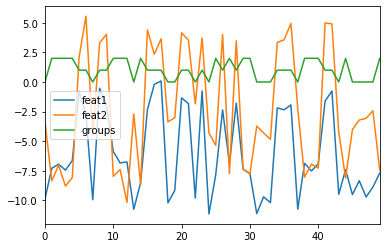

In [30]:
# k-means clustering

import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

feats, _ = make_blobs(
    n_samples=50,
    n_features=2,
    centers=3,
    random_state=1
)

df = pd.DataFrame(feats, columns=["feat1", "feat2"])
clusterer = KMeans(3, random_state=0)
clusterer.fit(feats)
df["groups"] = clusterer.predict(feats)
df.head(10)
df.plot()

### drop observations with missing values

In [31]:
# numpy

import numpy as np

feats = np.array([
    [1.1, 11.1],
    [2.2, 22.2],
    [3.3, 33.3],
    [4.4, 44.4],
    [np.nan, 55.5],
])
feats[~np.isnan(feats).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [32]:
# pandas

import pandas as pd

df = pd.DataFrame(feats, columns=["feat1", "feat2"])
df.dropna()

,feat1,feat2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


In [12]:
# k-nearest neighbors (KNN)

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

feats, _ = make_blobs(n_samples=1000,
                     n_features=2,
                     random_state=1)

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(feats)
# Replace the first feature's first value with a missing value
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

mean_imputer = SimpleImputer(strategy="mean")
feats_mean_imputed = mean_imputer.fit_transform(feats)

print(f"actual value: {true_value}")
print(f"Imputed value: {feats_mean_imputed[0,0]}")

actual value: 0.8730186113995938
Imputed value: -3.058372724614996


### 5- Handling Categorical Data (Skipped)

### 6- Hanlding Text

### cleaning text

In [1]:
text_data = ["     Lorem Ipsum is simply dummy text     ",
             "of the printing and typesetting industry",
             "   Lorem Ipsum has been the industry's standard dummy    "]

[x.strip() for x in text_data]

['Lorem Ipsum is simply dummy text',
 'of the printing and typesetting industry',
 "Lorem Ipsum has been the industry's standard dummy"]

In [4]:
[x.strip().upper() for x in text_data]

['LOREM IPSUM IS SIMPLY DUMMY TEXT',
 'OF THE PRINTING AND TYPESETTING INDUSTRY',
 "LOREM IPSUM HAS BEEN THE INDUSTRY'S STANDARD DUMMY"]

In [6]:
import re
[re.sub(r"[a-zA-Z]", "X", x).strip() for x in text_data]

['XXXXX XXXXX XX XXXXXX XXXXX XXXX',
 'XX XXX XXXXXXXX XXX XXXXXXXXXXX XXXXXXXX',
 "XXXXX XXXXX XXX XXXX XXX XXXXXXXX'X XXXXXXXX XXXXX"]

### claening HTML

In [16]:
from bs4 import BeautifulSoup

html = """
<div class='full_name'><span style='font-weight:bold'>Masego</span> Azra</div>
"""
soup = BeautifulSoup(html)
soup.find("div", {"class": "full_name"}).text

'Masego Azra'

### remove punctuations

In [3]:
import unicodedata
import sys

text_data = ['Hi!!!! I. Love. This. Song....',
             '10000% Agree!!!! #LoveIT',
             'Right?!?!']
punctuations = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))
punctuations
[x.translate(punctuations) for x in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

### tokenizing text

In [5]:
from nltk.tokenize import word_tokenize

string = "The science of today is the technology of tomorrow"

word_tokenize(string)

ModuleNotFoundError: No module named 'nltk'

In [6]:
from nltk.tokenize import sent_tokenize

string = "The science of today is the technology of tomorrow. Tomorrow is today"

sent_tokenize(string)

ModuleNotFoundError: No module named 'nltk'

### ----

In [11]:
import numpy as np
import pandas as pd

data = [
    [8,13,3.5],
    [10,12,3.1],
    [9,11,2.8],
    [8,14,1.5],
    [14,14,1.2],
]
df = pd.DataFrame(data, columns=["Age", "Score 1", "Score 2"])
df.loc[df['Age']==9, ['Score 1', 'Score 2']]

,Score 1,Score 2
2,11,2.8


In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'